In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

In [2]:
load_boston().keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [3]:
X,y=load_boston().data,load_boston().target

In [8]:
feature_names=load_boston().feature_names

In [10]:
len(feature_names),X.shape

(13, (506, 13))

In [7]:
load_boston().keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [11]:
data=pd.DataFrame(X,columns=feature_names)
data['price']=y

In [12]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


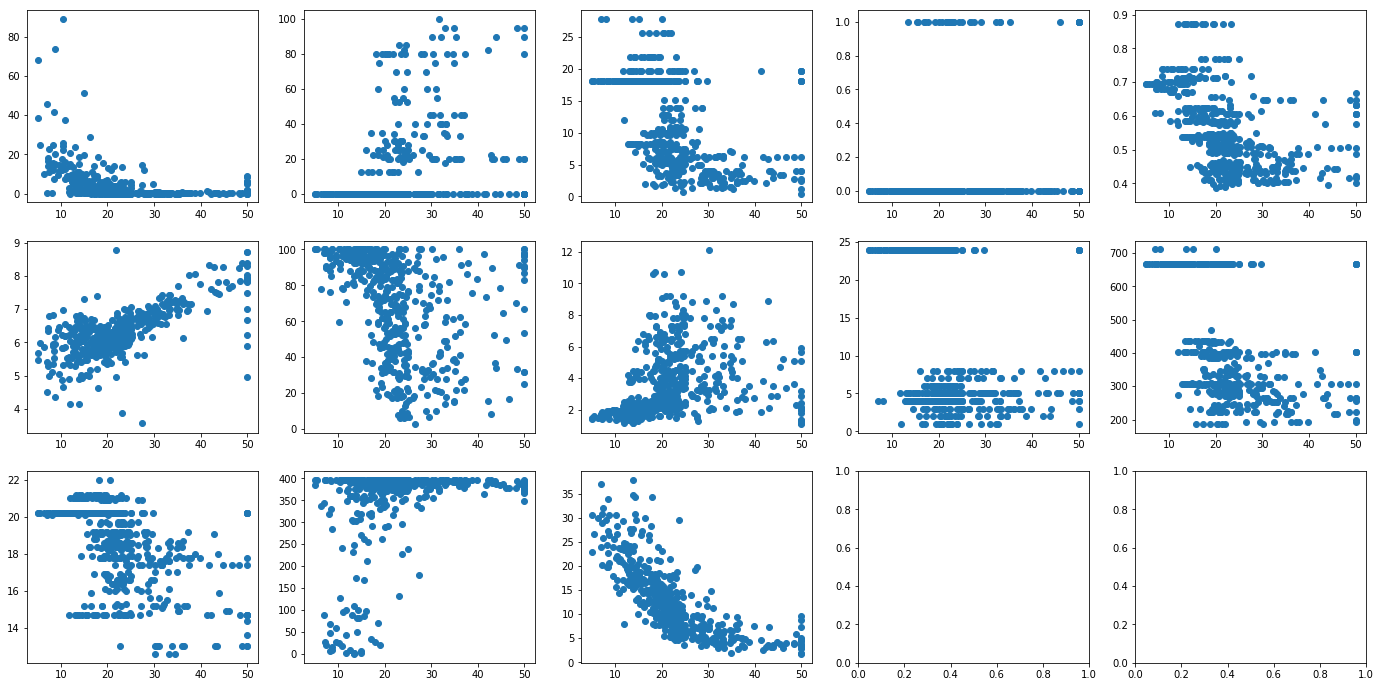

In [35]:
from matplotlib import pyplot as plt

fig,ax=plt.subplots(3,5,figsize=(24,12))
for i in range(3):
    for j in range(5):
        if i*5+j<13:
            ax[i,j].scatter(data['price'],data[feature_names[i*5+j]])
plt.show()

In [45]:
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

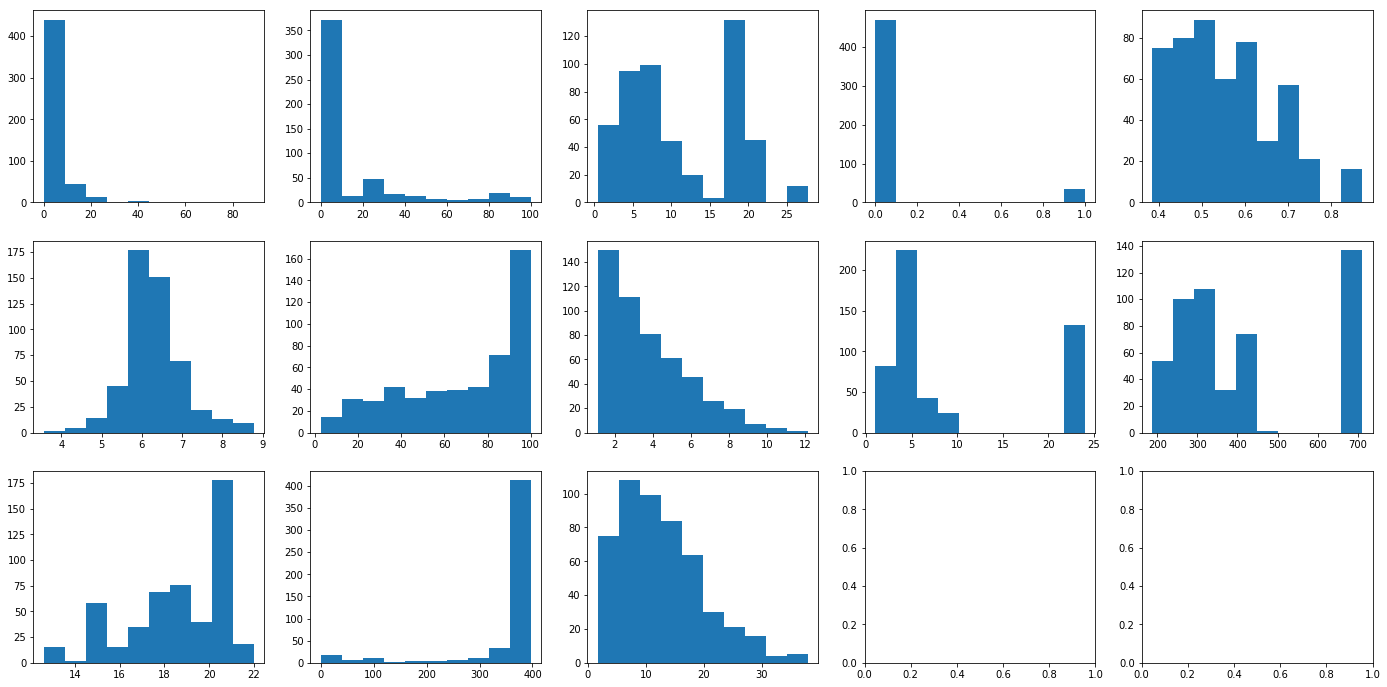

In [47]:
fig,ax=plt.subplots(3,5,figsize=(24,12))
for i in range(3):
    for j in range(5):
        if i*5+j<13:
            ax[i,j].hist(data[feature_names[i*5+j]],label=feature_names[i*5+j])
plt.show()

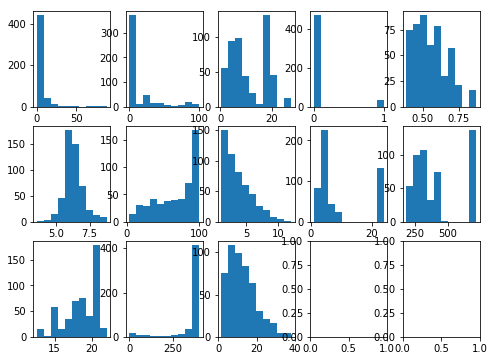

In [80]:
fig,ax=plt.subplots(3,5,figsize=(8,6))
for i in range(3):
    for j in range(5):
        if i*5+j<=12:
            ax[i][j].hist(data[feature_names[i*5+j]])
            

In [51]:
data['price'].max()

50.0

In [52]:
data['price'].min()

5.0

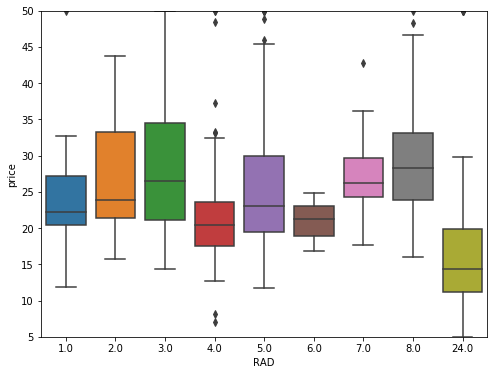

In [53]:
import seaborn as sns
f,ax=plt.subplots(figsize=(8,6))
fig=sns.boxplot(x='RAD',y='price',data=data)
#fig.axis(ymin=5,ymax=50)
plt.show()

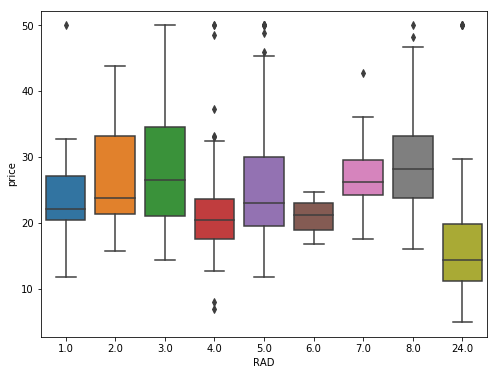

In [77]:
fig,ax=plt.subplots(figsize=(8,6))
sns.boxplot(data['RAD'],data['price'])

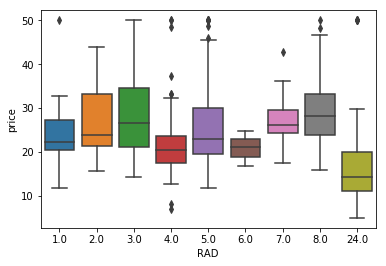

In [78]:
sns.boxplot(x='RAD',y='price',data=data)

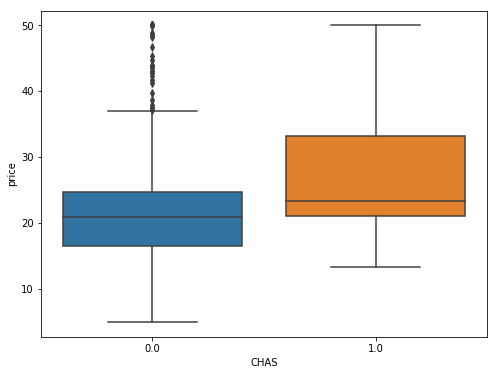

In [54]:
import seaborn as sns
f,ax=plt.subplots(figsize=(8,6))
fig=sns.boxplot(x='CHAS',y='price',data=data)
#fig.axis(ymin=5,ymax=50)
plt.show()

In [36]:
feature_varnum=dict()
for col in feature_names:
    feature_varnum[col]=data[col].nunique()
feature_varnum

{'CRIM': 504,
 'ZN': 26,
 'INDUS': 76,
 'CHAS': 2,
 'NOX': 81,
 'RM': 446,
 'AGE': 356,
 'DIS': 412,
 'RAD': 9,
 'TAX': 66,
 'PTRATIO': 46,
 'B': 357,
 'LSTAT': 455}

In [55]:
corr_df=data.corr()

In [89]:
cols=corr_df.nlargest(6,'price').index
cm=corr_df.nlargest(6,'price')[cols]

In [59]:
cm

,price,RM,ZN,B,DIS,CHAS
price,1.000000,0.695360,0.360445,0.333461,0.249929,0.175260
RM,0.695360,1.000000,0.311991,0.128069,0.205246,0.091251
ZN,0.360445,0.311991,1.000000,0.175520,0.664408,-0.042697
B,0.333461,0.128069,0.175520,1.000000,0.291512,0.048788
DIS,0.249929,0.205246,0.664408,0.291512,1.000000,-0.099176
CHAS,0.175260,0.091251,-0.042697,0.048788,-0.099176,1.000000


In [64]:
data['price'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: price, dtype: float64


 mu=22.53 and sigma=9.19



C:\Users\Tin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


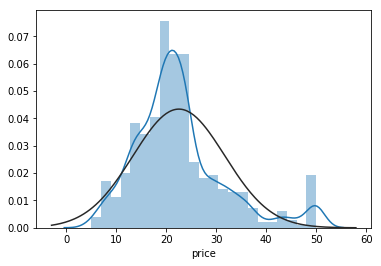

In [71]:
from scipy.stats import norm,skew
sns.distplot(data['price'],fit=norm)
mu,sigma=norm.fit(data['price'])
print('\n mu={:.2f} and sigma={:.2f}\n'.format(mu,sigma))

C:\Users\Tin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


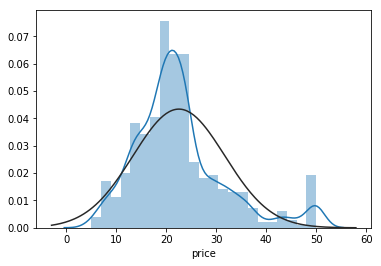

In [83]:
sns.distplot(data['price'],fit=norm)

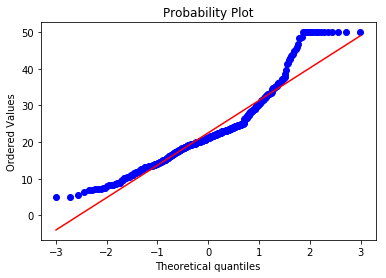

In [67]:
from scipy import stats
fig=plt.figure()
res=stats.probplot(data['price'],plot=plt)
plt.show()

In [69]:
data['price_norm']=np.log1p(data['price'])


 mu=3.09 and sigma=0.39



C:\Users\Tin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


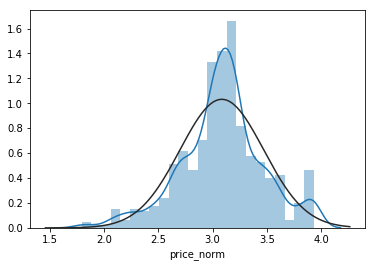

In [73]:
sns.distplot(data['price_norm'],fit=norm)
mu,sigma=norm.fit(data['price_norm'])
print('\n mu={:.2f} and sigma={:.2f}\n'.format(mu,sigma))

C:\Users\Tin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


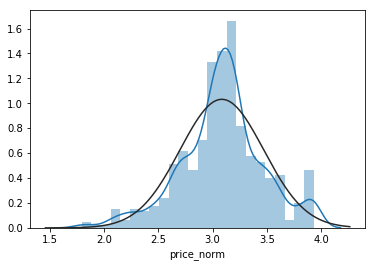

In [84]:
sns.distplot(data['price_norm'],fit=norm)

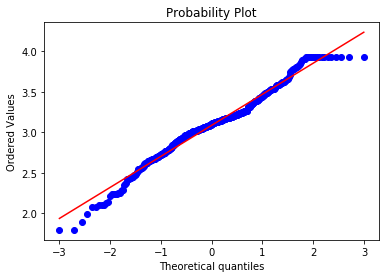

In [74]:
stats.probplot(data['price_norm'],plot=plt)
plt.show()

In [85]:
corr_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [93]:
cols=corr_df.nlargest(6,'price').index
mycm=corr_df.nlargest(6,'price')[cols]
mycm


,price,RM,ZN,B,DIS,CHAS
price,1.000000,0.695360,0.360445,0.333461,0.249929,0.175260
RM,0.695360,1.000000,0.311991,0.128069,0.205246,0.091251
ZN,0.360445,0.311991,1.000000,0.175520,0.664408,-0.042697
B,0.333461,0.128069,0.175520,1.000000,0.291512,0.048788
DIS,0.249929,0.205246,0.664408,0.291512,1.000000,-0.099176
CHAS,0.175260,0.091251,-0.042697,0.048788,-0.099176,1.000000


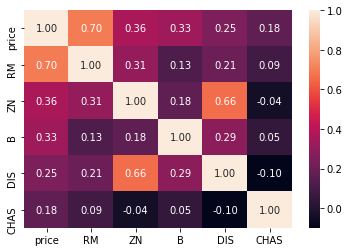

In [95]:
sns.heatmap(mycm,annot=True,fmt='.2f')

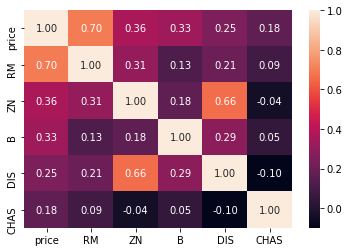

In [62]:
sns.heatmap(cm,annot=True,fmt='.2f')

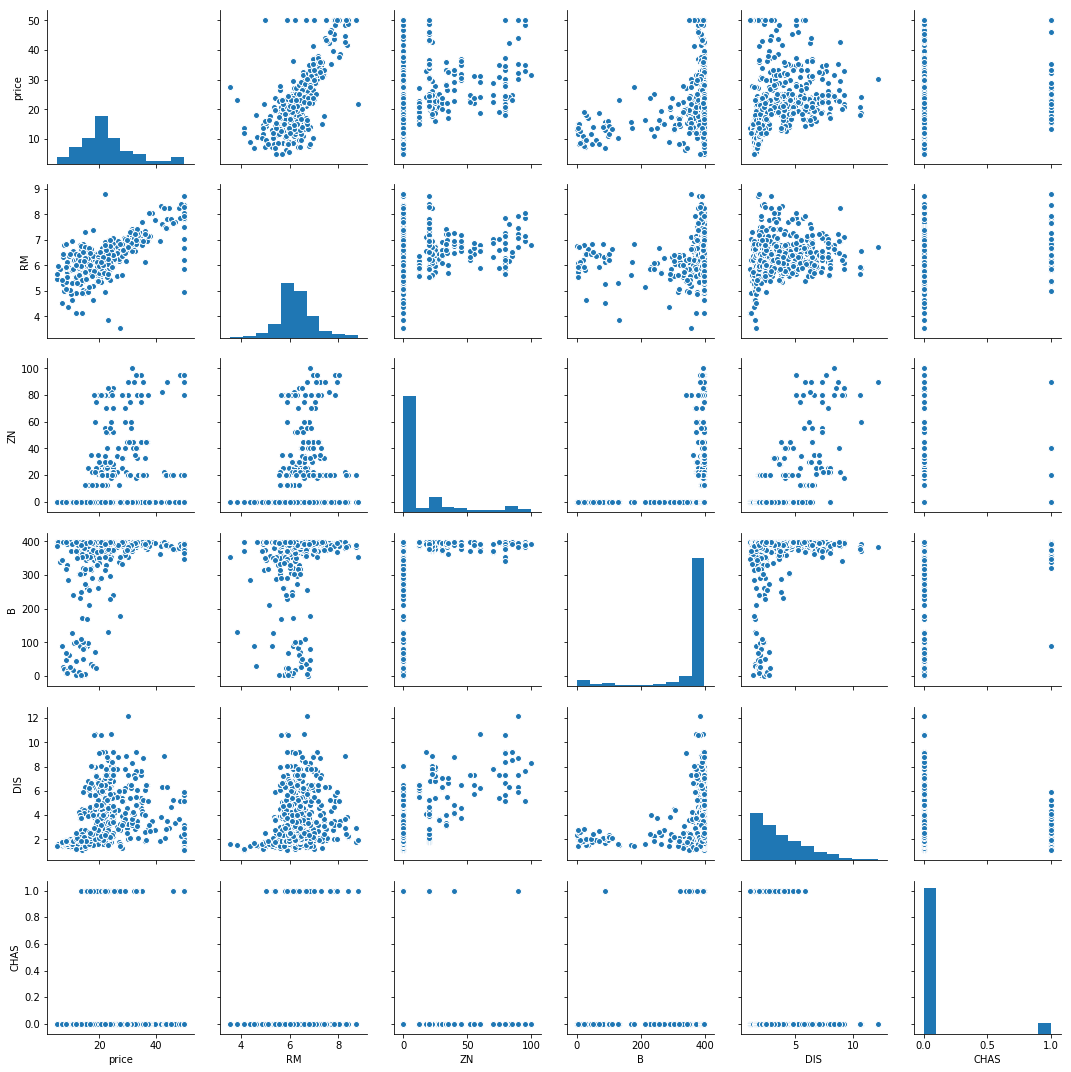

In [63]:
sns.pairplot(data[cols],size=2.5)
plt.show()

In [23]:
xy=np.concatenate([X,y.reshape(-1,1)],axis=1)

In [24]:
data=pd.DataFrame(xy,columns=load_boston().feature_names.tolist()+['target'])

In [25]:
data.shape

(506, 14)

In [26]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [32]:
from sklearn.linear_model import LinearRegression

In [28]:
feature_names=load_boston().feature_names

In [18]:
len(load_boston().feature_names)

13

In [27]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(data[feature_names],data['target'],test_size=0.2,random_state=0)

In [33]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
y_pre=lr.predict(x_test)

In [36]:
y_pre

array([24.89012999, 23.72488246, 29.37213304, 12.14010251, 21.4468654 ,
       19.28645278, 20.4963729 , 21.361896  , 18.90187947, 19.89240314,
        5.14887233, 16.34684109, 17.06012498,  5.60903056, 40.0046213 ,
       32.49427341, 22.46081666, 36.85586503, 30.86579318, 23.15478003,
       24.77656022, 24.67996181, 20.59378189, 30.35624965, 22.42640026,
       10.22873821, 17.64814177, 18.26038473, 35.5307741 , 20.96125278,
       18.3033109 , 17.78873855, 19.96636449, 24.06489726, 29.10613394,
       19.26824306, 11.16302351, 24.57838036, 17.55060167, 15.4775377 ,
       26.21443038, 20.86590644, 22.31521746, 15.60756369, 23.00542683,
       25.17799668, 20.1224094 , 22.89324789, 10.03421509, 24.28328238,
       20.90741758, 17.34683545, 24.52357489, 29.93973985, 13.41445583,
       21.72648406, 20.79476218, 15.49582771, 14.00076106, 22.18730294,
       17.7328223 , 21.58942   , 32.9052782 , 31.11274689, 17.74095677,
       32.76792649, 18.69693213, 19.78338311, 19.00577539, 22.90

In [40]:
from sklearn.metrics import precision_score,recall_score,f1_score,mean_squared_error

In [43]:
mean_squared_error(y_pre,y_test)

33.45070896769105

In [ ]:
precision_score(y)

In [12]:
len(X)

506